## 微分方程

步骤：
 - 定义符号
 - 定义因变量
 - 写出微分方程左边
 - dsolve得通解
 - 将初始条件字典匹配
 - apply_ics解出特解

写法：
- y对x的二阶偏导：y(x).diff(x,2)
- y对x的一阶偏导：y(x).diff(x)

<img src="../images/iShot2021-08-12 17.26.35.png"/>

In [26]:
import numpy as np
from scipy import integrate
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(sys.executable)
!which python
!which pip
import sympy

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/bin/python
/Users/Bureaux/opt/miniconda3/envs/Modeling-base/bin/python
/Users/Bureaux/opt/miniconda3/envs/Modeling-base/bin/pip


In [27]:
sympy.init_printing()  #初始化打印环境
t, omega0, gamma = sympy.symbols("t, omega_0, gamma", positive=True)  #标记参数，且均为正
x = sympy.Function('x')  # 标记x是微分函数，非变量
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0 ** 2 * x(t)
ode_sol = sympy.dsolve(ode)  # 用diff()和dsolve得到通解
ode_sol

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/Bureaux/op

In [28]:
def apply_ics(sol, ics, x, known_params):
    free_params = sol.free_symbols - set(known_params)
    print("free_symbols:")
    print(sol.free_symbols)
    print("known_params:")
    print(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics) for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    print(type(sol_params))
    sympy.pprint(sol_params)
    return sol.subs(sol_params)


free_symbols:
{t, C2, gamma, omega_0, C1}
known_params:
[omega_0, gamma]
<class 'dict'>
⎧                γ             1                γ             1⎫
⎪C₁: - ───────────────────── + ─, C₂: ───────────────────── + ─⎪
⎨          _______   _______   2          _______   _______   2⎬
⎪      2⋅╲╱ γ - 1 ⋅╲╱ γ + 1           2⋅╲╱ γ - 1 ⋅╲╱ γ + 1     ⎪
⎩                                                              ⎭


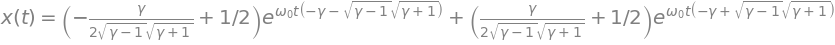

In [29]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}  #将初始条件字典匹配
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

## sympy 库

In [30]:
sympy.pprint(sympy.I)
sympy.pprint(sympy.I ** 2)
sympy.pprint(sympy.E)
sympy.pprint(sympy.log(sympy.E))
sympy.pprint(1 / sympy.oo)
sympy.pprint(1 + sympy.oo)
sympy.pprint(sympy.pi)

ⅈ
-1
ℯ
1
0
∞
π


In [31]:
# 首先定义 `x`为一个符号，代表一个未知数
x = sympy.Symbol('x')
# 解方程：x - 1 = 0
sympy.pprint(sympy.solve(x - 1, x))
# 解方程：x ^ 2 - 1 = 0
sympy.pprint(sympy.solve(x ** 2 - 1, x))
# 解方程：x ^ 2 + 1 = 0
sympy.pprint(sympy.solve(x ** 2 + 1, x))

[1]
[-1, 1]
[-ⅈ, ⅈ]


解x+y=1 x-y=3

In [32]:
x, y = sympy.symbols('x y')
sympy.pprint(sympy.solve([x + y - 1, x - y - 3], [x, y]))

{x: 2, y: -1}


## 计算求和式
计算求和式可以使用sympy.summation函数，其函数原型为：sympy.summation(f, *symbols, **kwargs)。

∑n=1-100(2n)

In [33]:
n = sympy.Symbol('n')
sympy.pprint(sympy.summation(2 * n, (n, 1, 100)))

10100


<img src="../images/iShot2021-08-16 11.14.26.png"/>

In [34]:
x = sympy.Symbol('x')
i = sympy.Symbol('i', integer=True)
f = sympy.summation(x, (i, 1, 5)) + 10 * x - 15
sympy.pprint(sympy.solve(f, x))

[1]


## 求极限
<img src="../images/iShot2021-08-16 11.19.04.png"/>

In [35]:
f = (1 + 1 / x) ** x
sympy.pprint(sympy.limit(f, x, sympy.oo))

ℯ


## 求导

In [36]:
x = sympy.Symbol('x')
f = x ** 3 + 2 * x + 1
sympy.diff(f, x)

## 求定积分
<img src="../images/iShot2021-08-16 13.28.41.png"/>

In [37]:
t, x = sympy.symbols('t x')
f = 2 * t
g = sympy.integrate(f, (t, 0, x))
sympy.pprint(sympy.integrate(g, (x, 0, 3)))

9


## 求不定积分
<img src="../images/iShot2021-08-16 13.32.34.png"/>

In [38]:
x = sympy.Symbol('x')
f = sympy.E ** x + 2 * x
sympy.integrate(f, x)

## 公式的展开与折叠

In [39]:
x = sympy.Symbol('x')
f = (1 + 2 * x) * x ** 2
sympy.expand(f)

In [40]:
## 公式分离与合并

In [41]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

x = sympy.Symbol('x')
y = sympy.Symbol('y')
#公式展开用apart方法,和expand区别不是很大，常用于分数进行分离
f = (x + 2) / (x + 1)
ff = sympy.apart(f)
sympy.pprint(ff)
#公式折叠用tegother方法
f = (1 / x + 1 / y)
ff = sympy.together(f)
sympy.pprint(ff)

      1  
1 + ─────
    x + 1
x + y
─────
 x⋅y 


In [42]:

#simplify( )普通的化简
sympy.pprint(sympy.simplify((x ** 3 + x ** 2 - x - 1) / (x ** 2 + 2 * x + 1)))
#trigsimp( )三角化简
sympy.pprint(sympy.trigsimp(sympy.sin(x) / sympy.cos(x)))
#powsimp( )指数化简
sympy.pprint(sympy.powsimp(x ** 2 * x ** 3))

x - 1
tan(x)
 5
x 


## 绘制二维图

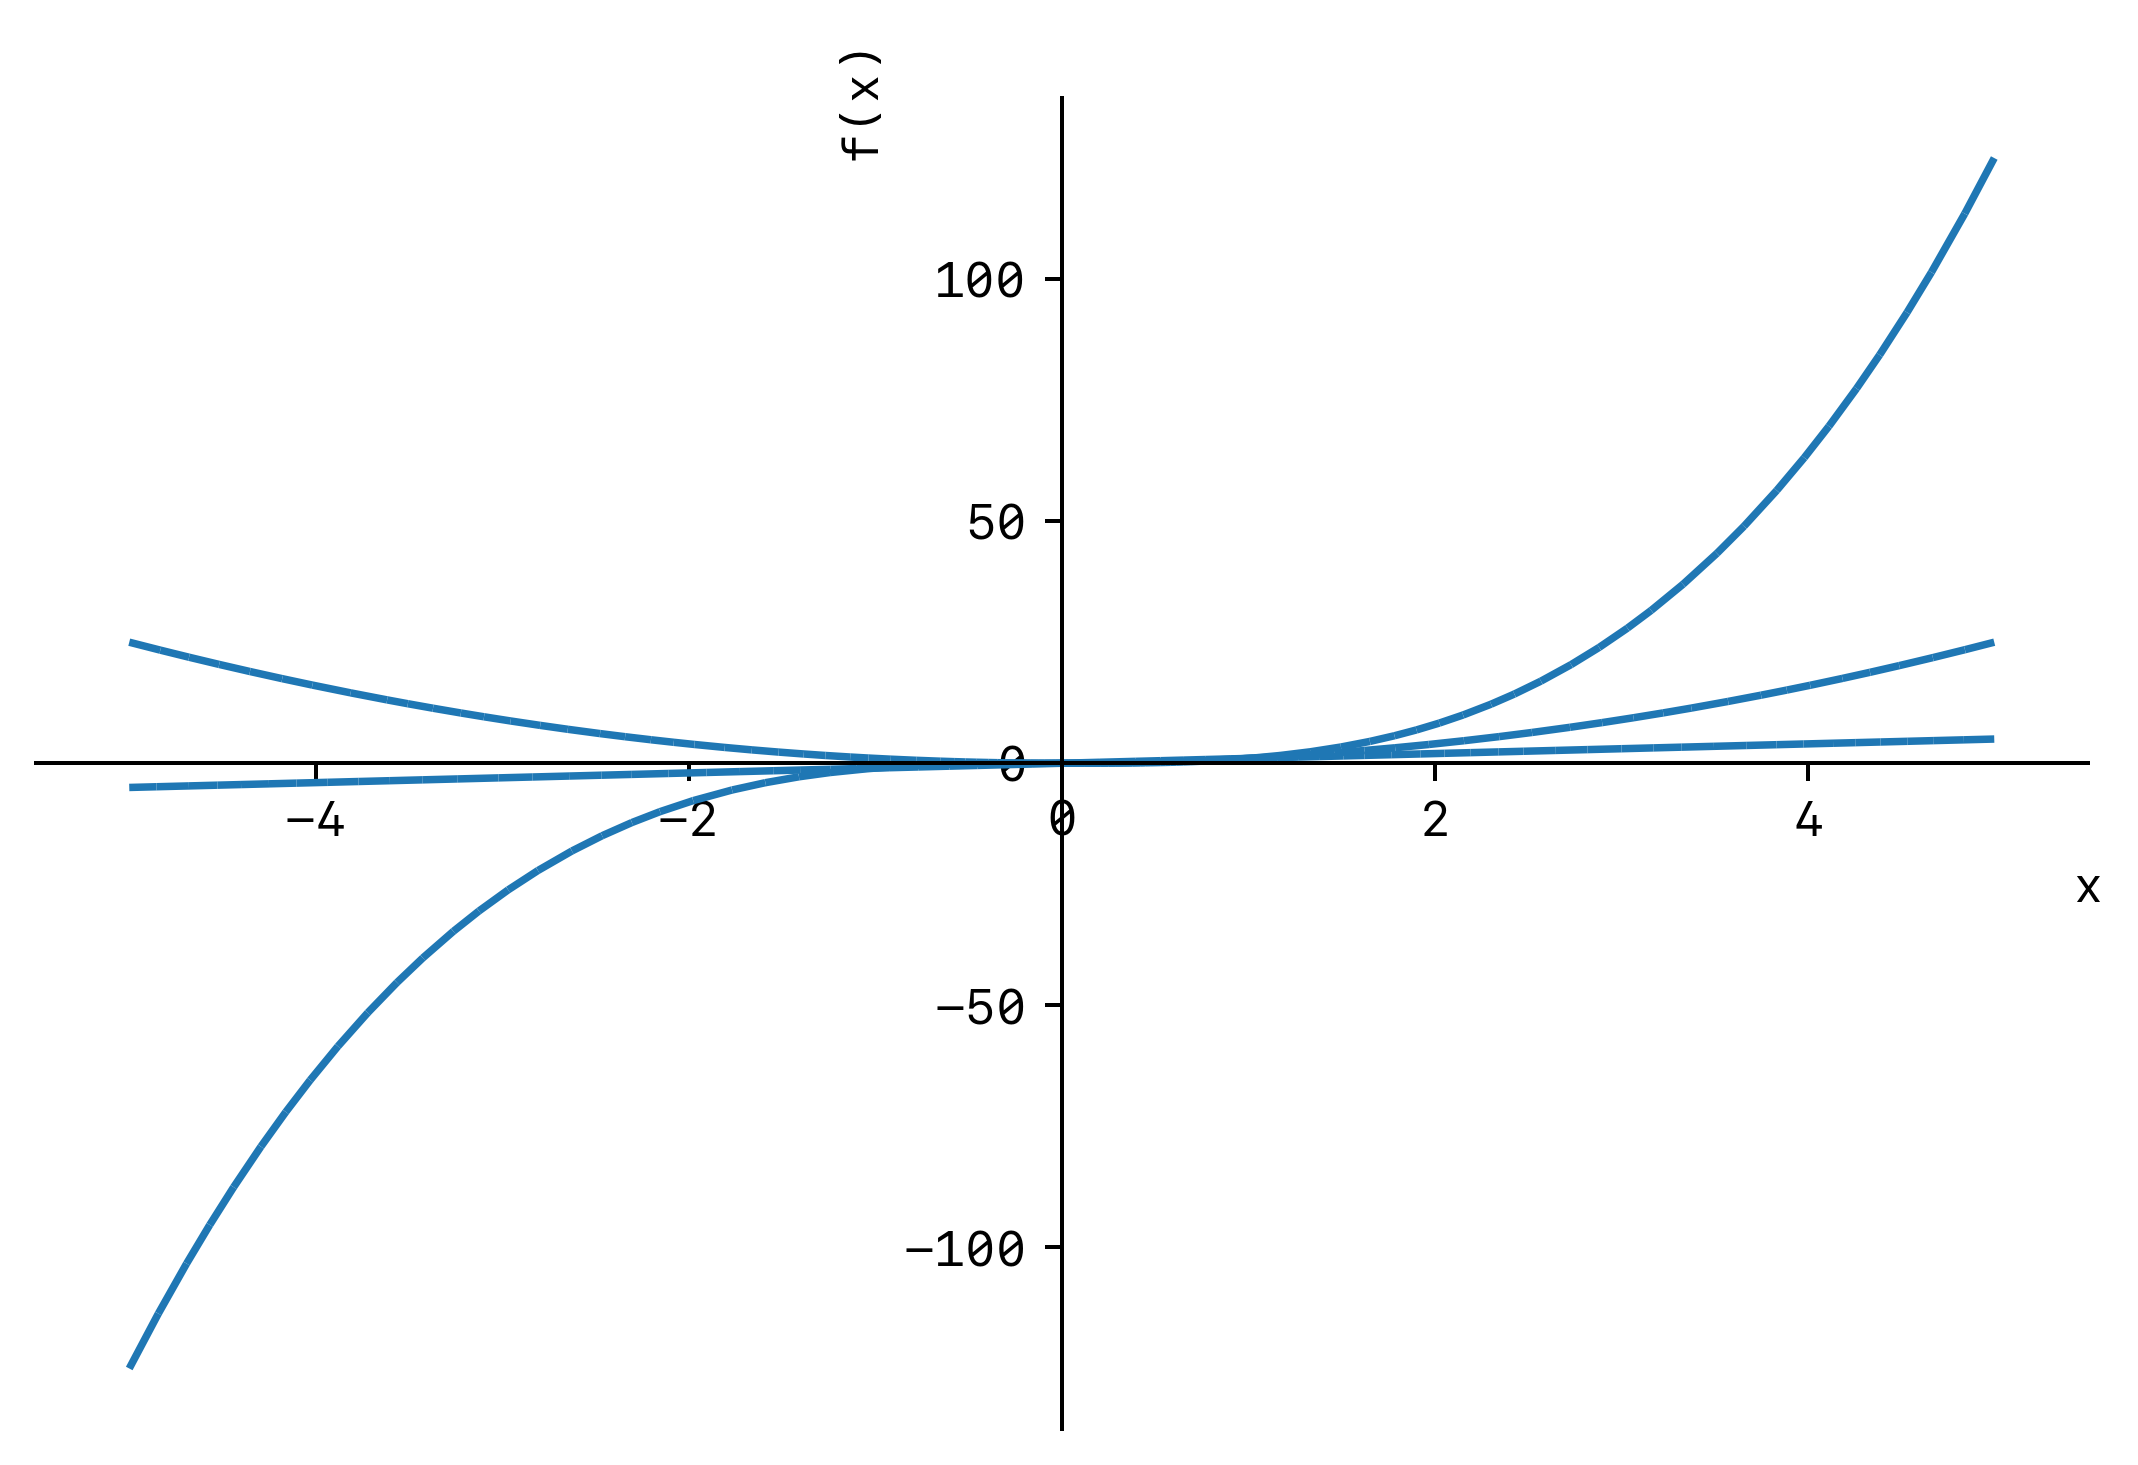

In [43]:
x = sympy.Symbol('x')
sympy.plotting.plot(x, x ** 2, x ** 3, (x, -5, 5))

## 绘制三维图

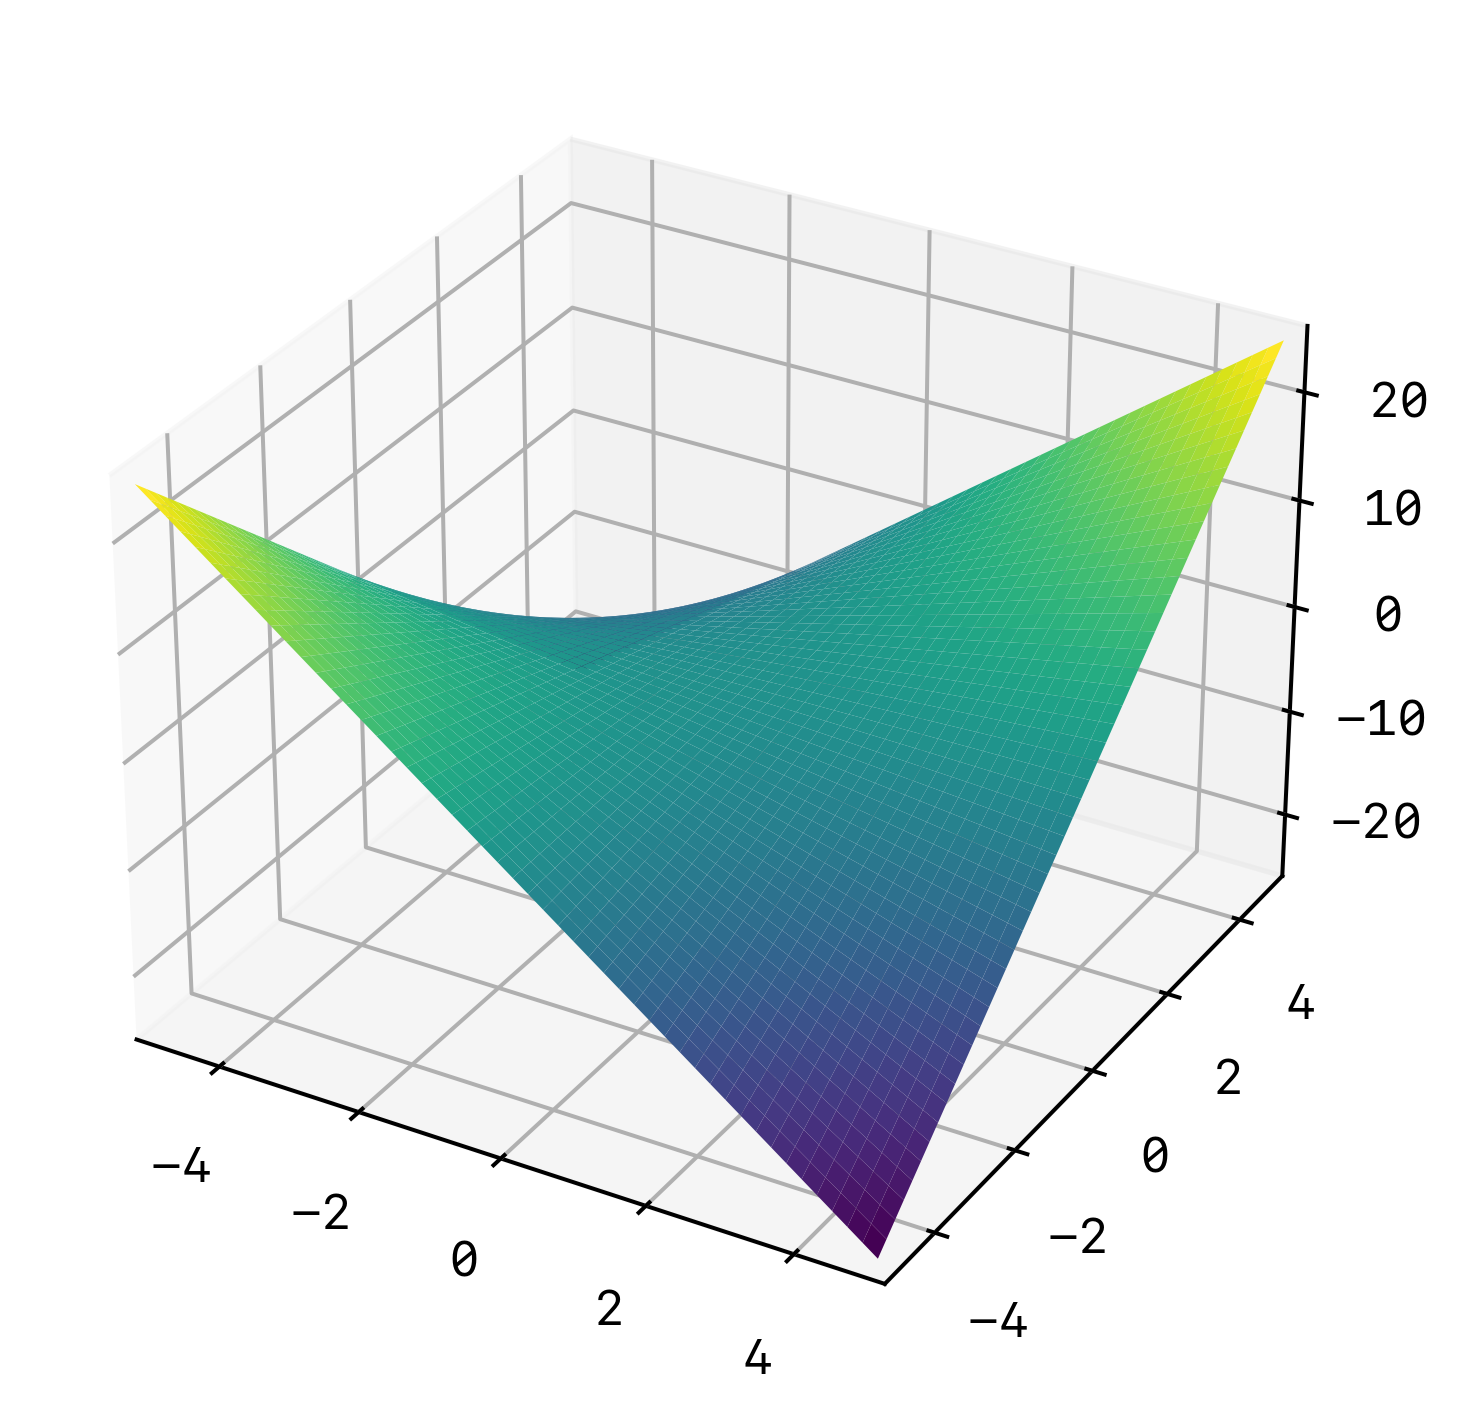

In [44]:
x, y = sympy.symbols('x y')
sympy.plotting.plot3d(x * y, (x, -5, 5), (y, -5, 5))

## 简单微分方程特解
- eq.lhs 表示等号左边的代数式（left hand side）
- eq.rhs 表示等号右边的代数式（right hand side）
<img src="../images/iShot2021-08-16 13.48.14.png"/>

In [45]:
# 写法1
f = sympy.symbols('f', cls=sympy.Function)
x = sympy.symbols('x')
eq = sympy.Eq(f(x).diff(x, 1) + f(x) + f(x) ** 2, 0)
eqr = sympy.dsolve(eq, f(x))
sympy.pprint(eqr)  # 通解
sympy.pprint(eqr.free_symbols)
C1 = eqr.free_symbols - {x}
C = list(C1)[0]
sympy.pprint(C)
eqr1 = eqr.subs(x, 0).subs(f(0), 1)
r = sympy.solve(eqr1.lhs - eqr1.rhs, C1)
print(r)
sympy.pprint(eqr.subs({C: r[0]}))

         -C₁  
f(x) = ───────
             x
       C₁ - ℯ 
{C₁, x}
C₁
[1/2]
          -1     
f(x) = ──────────
         ⎛1    x⎞
       2⋅⎜─ - ℯ ⎟
         ⎝2     ⎠


In [46]:
# 写法2
f = sympy.symbols('f', cls=sympy.Function)
x = sympy.symbols('x')
eq = sympy.Eq(f(x).diff(x, 1) + f(x) + f(x) ** 2, 0)
eqr = sympy.dsolve(eq, f(x))
C1 = eqr.free_symbols - {x}
ics = {f(0): 1}
eqs = [(eqr.lhs - eqr.rhs).subs(x, 0).subs(ics) for n in range(len(ics))]
sol_params = sympy.solve(eqs, C1)
sympy.pprint(eqr.subs(sol_params))

          -1     
f(x) = ──────────
         ⎛1    x⎞
       2⋅⎜─ - ℯ ⎟
         ⎝2     ⎠


<img src="../images/iShot2021-08-16 16.17.10.png"/>


In [47]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx ** 2 / np.sqrt(dx ** 2 + Dy ** 2)
            Dy = 0.8 * Dy * dy / np.sqrt(dx ** 2 + Dy ** 2)
            ax.plot([xx - Dx / 2, xx + Dx / 2], [yy - Dy / 2, yy + Dy / 2], 'b', lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$% s$" % (sympy.latex(sympy.Eq(y_x.diff(x), f_xy))), fontsize=18)
    return ax

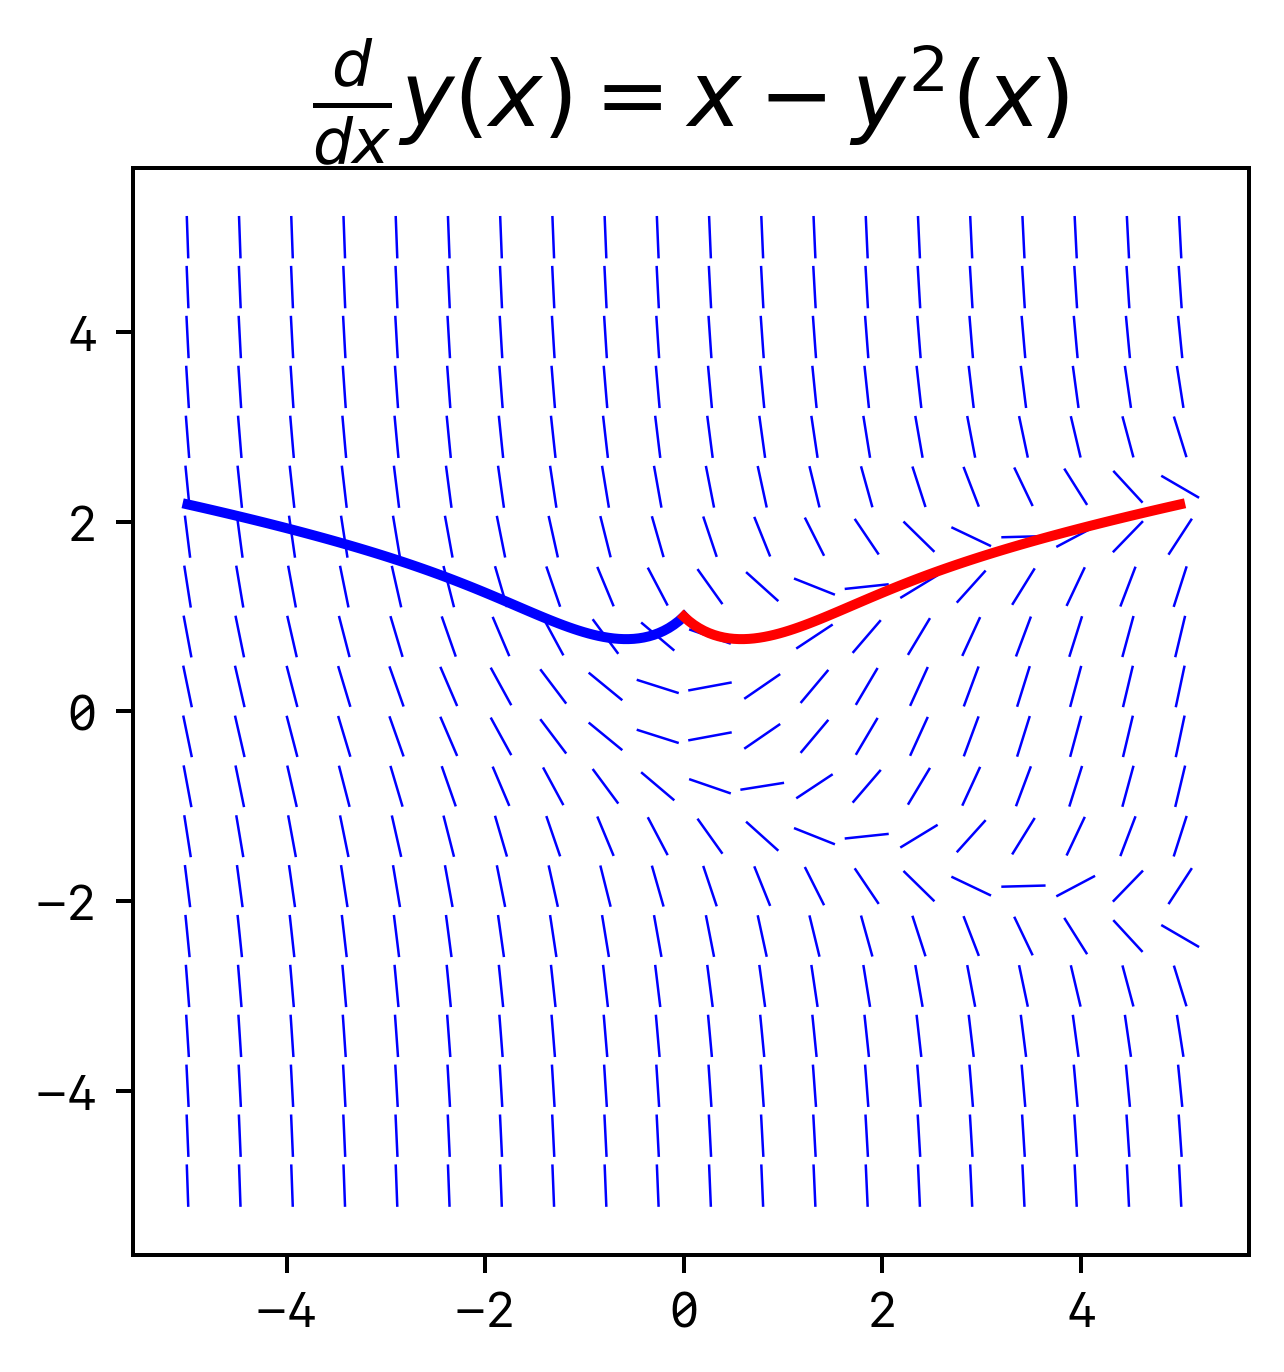

In [48]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率

x = sympy.symbols('x')
y = sympy.Function('y')
f = x - y(x) ** 2
f_np = sympy.lambdify((y(x), x), f)  #符号表达式转隐函数
y0 = 1
xp = np.linspace(0, 5, 100)
yp = integrate.odeint(f_np, y0, xp)  #初始y0解f_np,x范围xp
xn = np.linspace(0, -5, 100)
yn = integrate.odeint(f_np, y0, xp)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)  #绘制f的场线图
ax.plot(xn, yn, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)
plt.show()

<img src="../images/iShot2021-08-16 16.48.42.png"/>

In [49]:
def dmove(Point, t, sets):
    p, r, b = sets
    x, y, z = Point
    return np.array([p * (y - x), x * (r - z), x * y - b * z])

/Users/Bureaux/opt/miniconda3/envs/Modeling-base/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


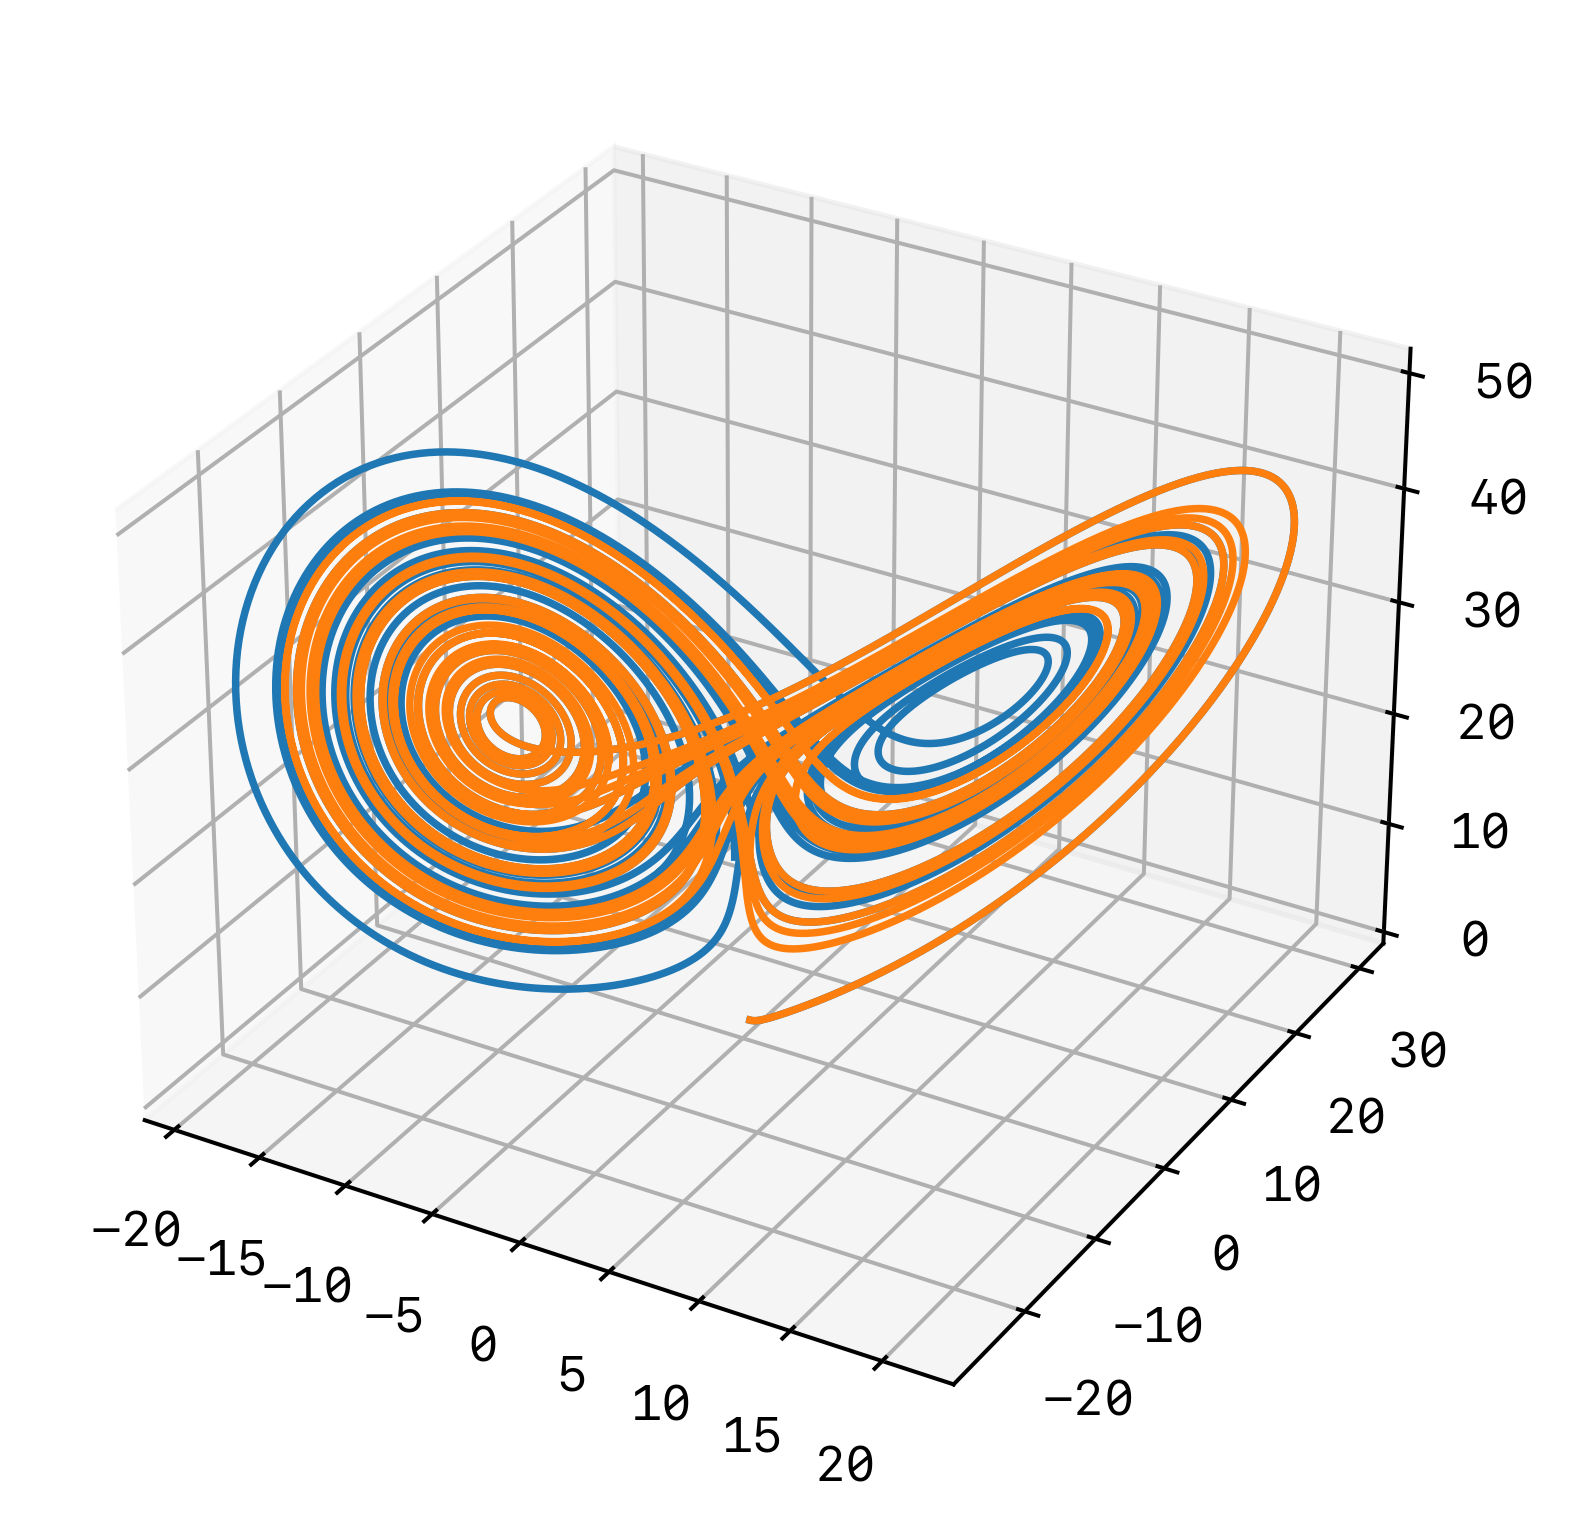

In [50]:
t = np.arange(0, 30, 0.001)
P1 = integrate.odeint(dmove, (0., 1., 0.), t, args=([10., 28., 3.],))
P2 = integrate.odeint(dmove, (0., 1.01, 0.), t, args=([10., 28., 3.],))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(P1[:, 0], P1[:, 1], P1[:, 2])
ax.plot(P2[:, 0], P2[:, 1], P2[:, 2])
plt.show()

## 用SciPy求微分方程

odeint()函数是scipy库中一个数值求解微分方程的函数
odeint()函数需要至少三个变量，第一个是微分方程函数，第二个是微分方程初值，第三个是微分的自变量。

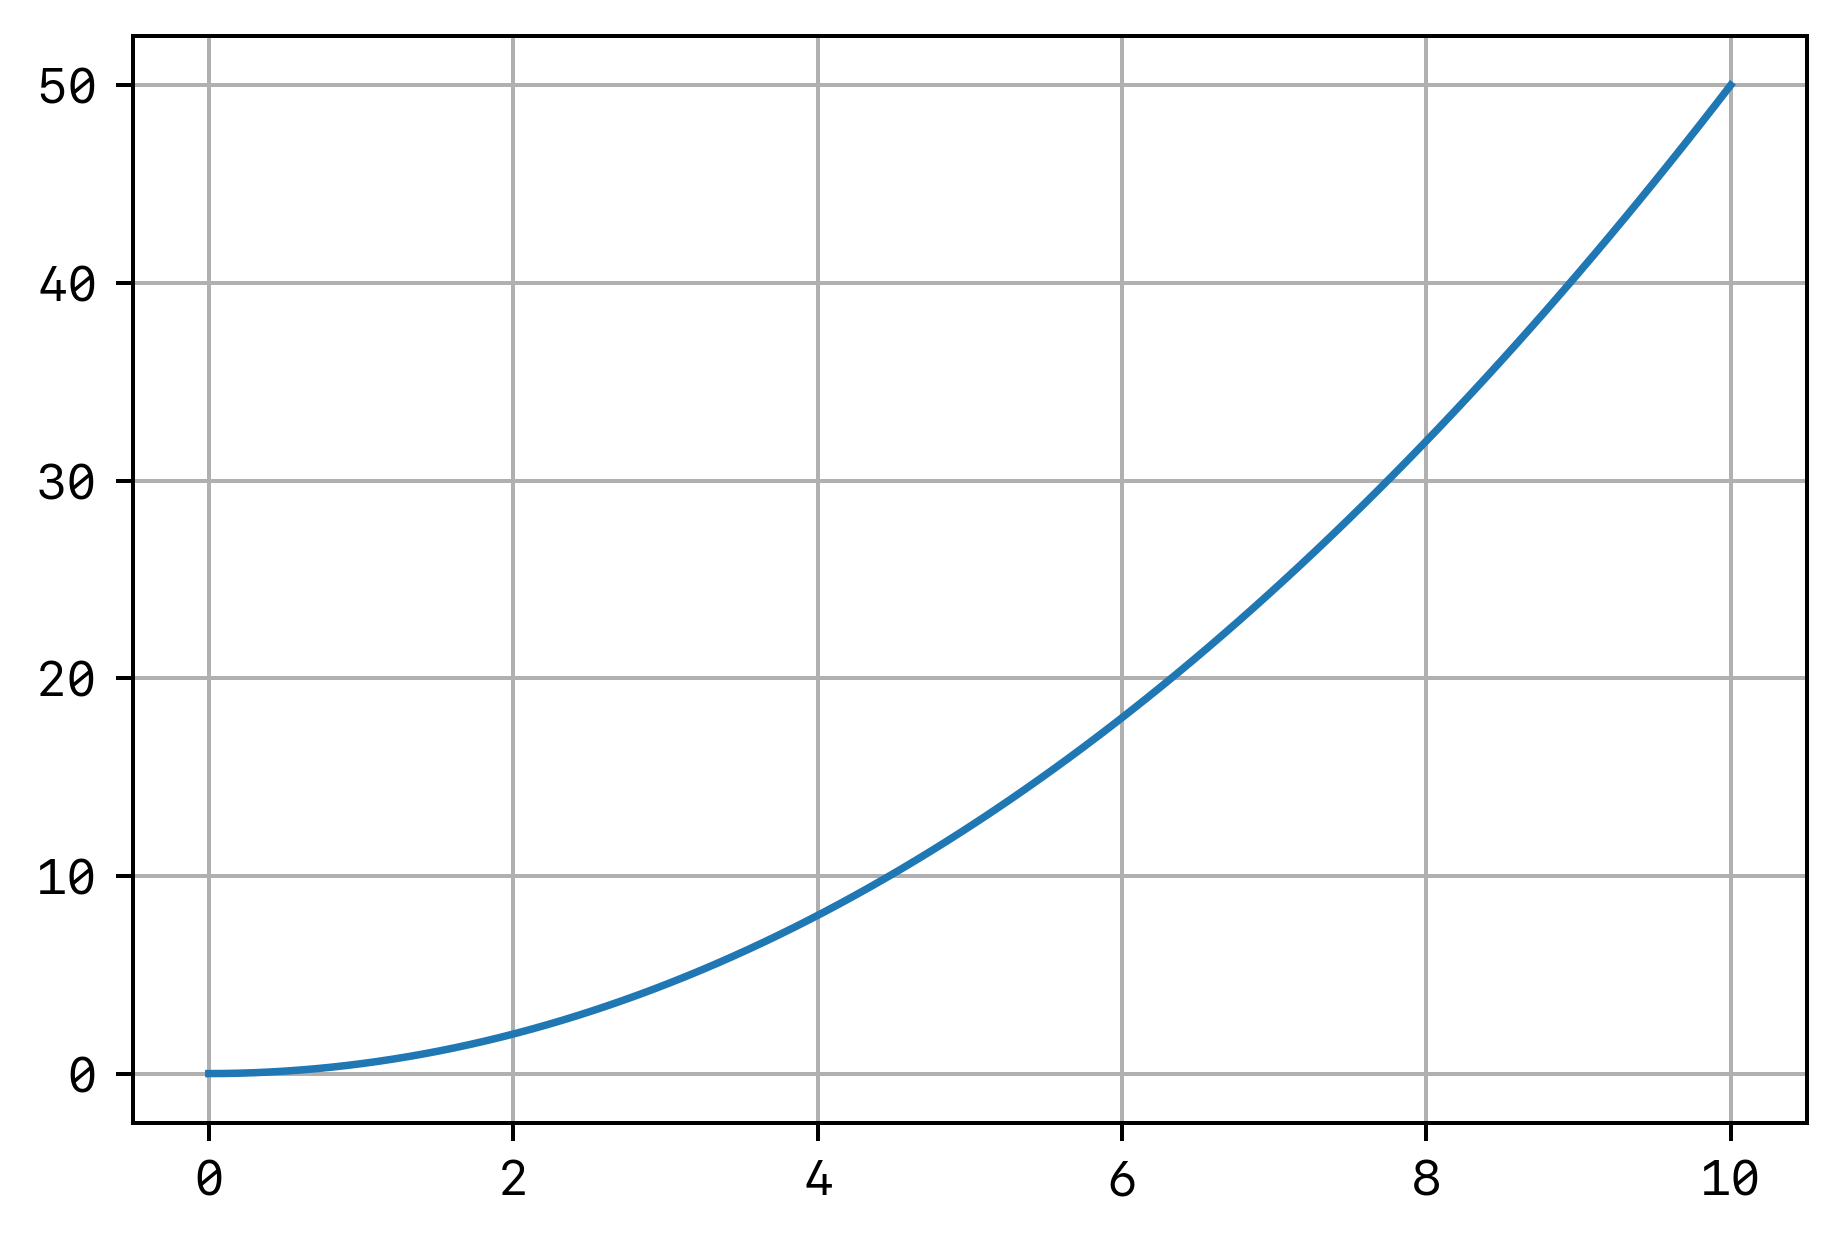

In [52]:
def diff(y, x):
    return np.array(x)


# 上面定义的函数在odeint里面体现的就是dy/dx = x
x = np.linspace(0, 10, 100)  # 给出x范围
y = integrate.odeint(diff, 0, x)  # 设初值为0 此时y为一个数组，元素为不同x对应的y值
# 也可以直接y = odeint(lambda y, x: x, 0, x)
plt.plot(x, y[:, 0])  # y数组（矩阵）的第一列，（因为维度相同，plt.plot(x, y)效果相同）
plt.grid()
plt.show()

An example of using ODEINT is with the following differential equation with parameter k=0.3, the initial condition y0=5 and the following differential equation.

<img src="../images/iShot2021-08-16 17.35.17.png"/>

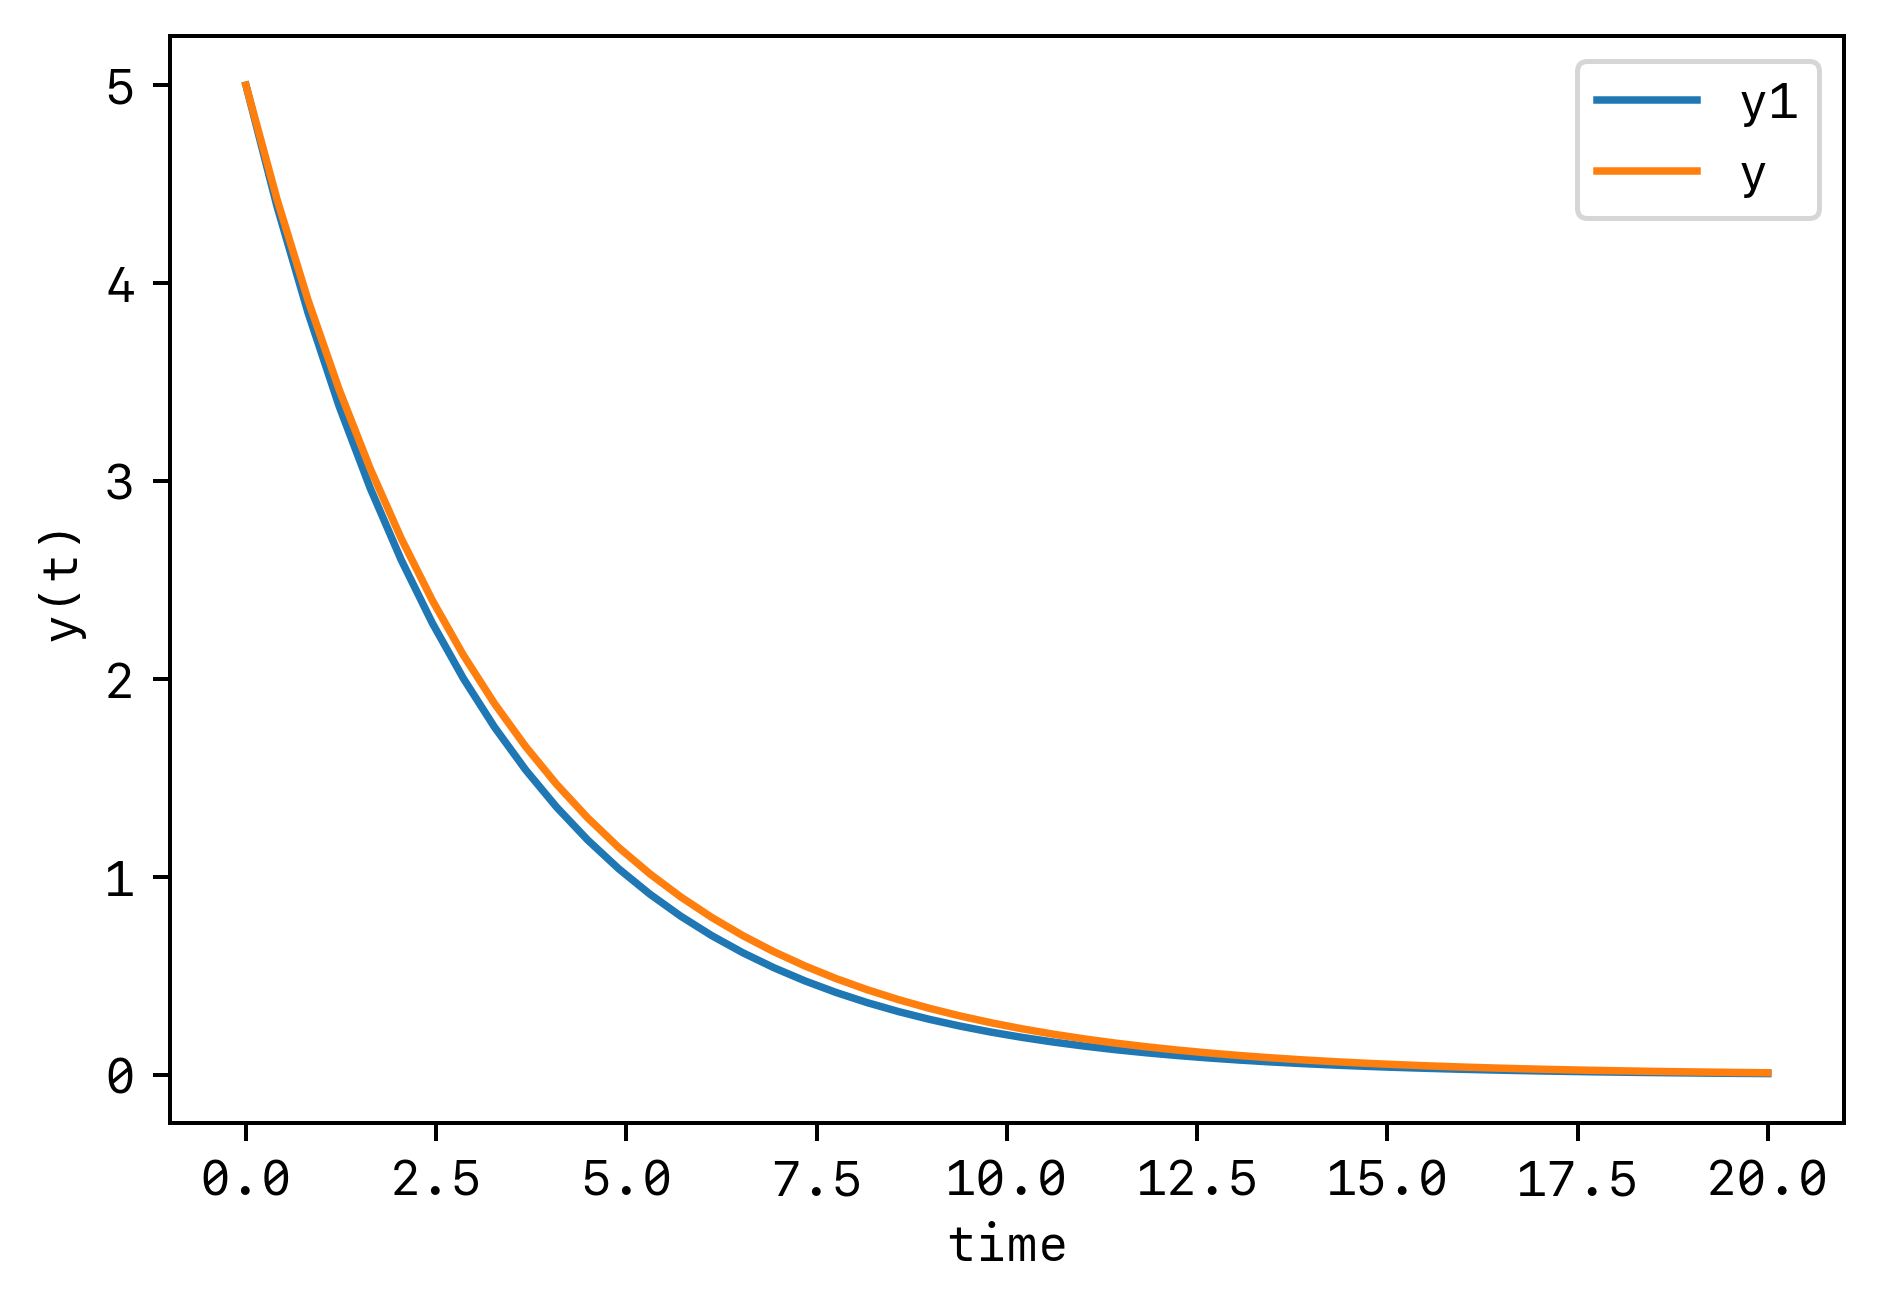

In [59]:
# function that returns dy/dt
def model(y, t):
    k = 0.3
    dydt = -k * y
    return dydt


# initial condition
y0 = 5

# time points
[t, dt] = np.linspace(0, 20, retstep=True)

# solve ODE
y = integrate.odeint(model, y0, t)

# another way to do
# Numpy.empty()大小(行数,列数)shape,类型由参数dtype来指定。
# Numpy.empty_like()生成和已有数组相同大小，类型的数组。
y1 = np.empty_like(t)
y1[0] = y0

for i in range(len(t) - 1):
    y1[i + 1] = y1[i] + dt * model(y1[i], t)

# plot results
plt.plot(t, y1, label='y1')
plt.plot(t, y, label='y')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend(loc='best')
plt.show()